In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("AirPassengers.csv")

In [ ]:
data.head()

Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [ ]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [ ]:
# date time format.
data['Month']=pd.to_datetime(data['Month'])

In [ ]:
data.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [ ]:
data.head()

Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121

In [ ]:
# setting the index as month.
# 
data=data.set_index(data['Month'])

In [ ]:
# alternative way
data.index=data['Month']

In [ ]:
data.head()

Month  #Passengers
Month                             
1949-01-01 1949-01-01          112
1949-02-01 1949-02-01          118
1949-03-01 1949-03-01          132
1949-04-01 1949-04-01          129
1949-05-01 1949-05-01          121

In [ ]:
del data['Month']

In [ ]:
data.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [ ]:
data.shape

(144, 1)

In [ ]:
data.isna().sum()

#Passengers    0
dtype: int64

In [ ]:
data.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [ ]:
import matplotlib.pyplot as plt

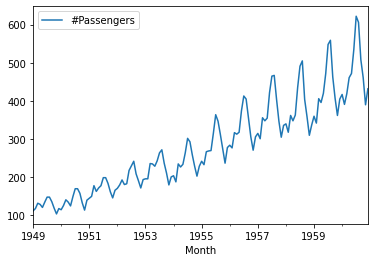

In [ ]:
data.plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

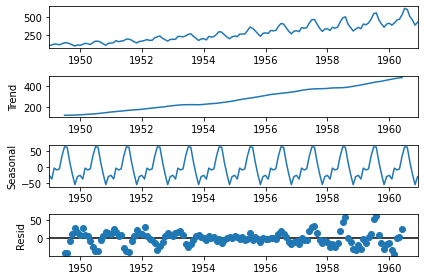

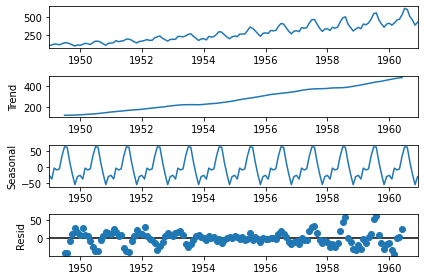

In [ ]:
dec_r=seasonal_decompose(data)

dec_r.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result=adfuller(data['#Passengers'])

In [ ]:
result

(0.8153688792060472,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [ ]:
print('ADF statistics:',result[0])
print('P value',result[1])

ADF statistics: 0.8153688792060472
P value 0.991880243437641


In [ ]:
rolling_mean=data.rolling(window=12).mean()

In [ ]:
data

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]

In [ ]:
rolling_mean

#Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]

In [ ]:
rolling_mean_detrended=data-rolling_mean   # detrending the timseries.

In [ ]:
rolling_mean_detrended

#Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   142.666667
1960-09-01    40.916667
1960-10-01   -10.583333
1960-11-01   -83.916667
1960-12-01   -44.166667

[144 rows x 1 columns]

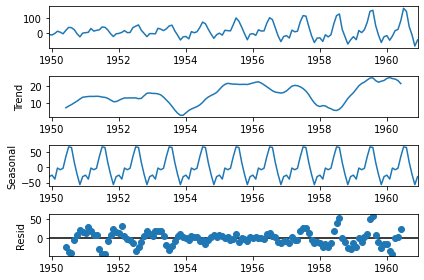

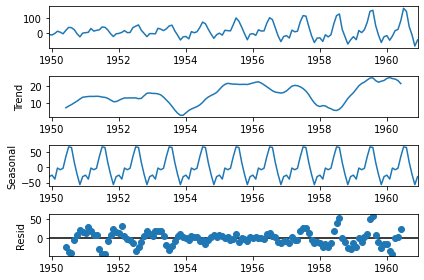

In [ ]:
# analysing the rolling mean differencing.
dec_r_dt=seasonal_decompose(rolling_mean_detrended.dropna())

dec_r_dt.plot()

In [ ]:
# reduce the sesonality from timeseries.

rolling_mean_detrended

#Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   142.666667
1960-09-01    40.916667
1960-10-01   -10.583333
1960-11-01   -83.916667
1960-12-01   -44.166667

[144 rows x 1 columns]

In [ ]:
rolling_mean_detrended.shift()  # shifted the observation  by 1 month.

#Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   162.583333
1960-09-01   142.666667
1960-10-01    40.916667
1960-11-01   -10.583333
1960-12-01   -83.916667

[144 rows x 1 columns]

In [ ]:
rolling_mean_detrended_diff=rolling_mean_detrended-rolling_mean_detrended.shift()

In [ ]:
rolling_mean_detrended_diff

#Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   -19.916667
1960-09-01  -101.750000
1960-10-01   -51.500000
1960-11-01   -73.333333
1960-12-01    39.750000

[144 rows x 1 columns]

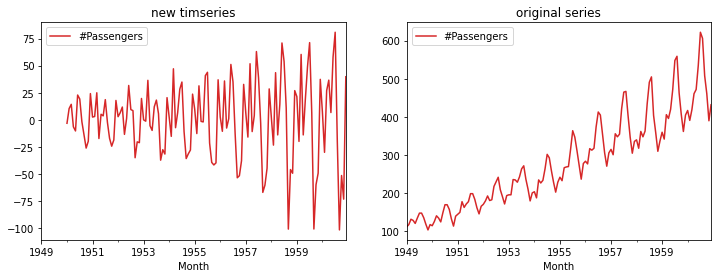

In [ ]:
# visulaizing the timeseries.
ax1=plt.subplot(121)
rolling_mean_detrended_diff.plot(figsize=(12,4),color="tab:red",title="new timseries",ax=ax1)


ax2=plt.subplot(122)
data.plot(figsize=(12,4),color="tab:red",title="original series",ax=ax2)

In [ ]:
result1=adfuller(rolling_mean_detrended_diff['#Passengers'].dropna())

In [ ]:
result1

(-3.1544826348635744,
 0.022775264967859313,
 12,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 908.7516655845259)

In [ ]:
print('ADF statistics:',result1[0])
print('P value',result1[1])

ADF statistics: -3.1544826348635744
P value 0.022775264967859313


In [ ]:
rolling_mean_detrended_diff=rolling_mean_detrended_diff.dropna()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

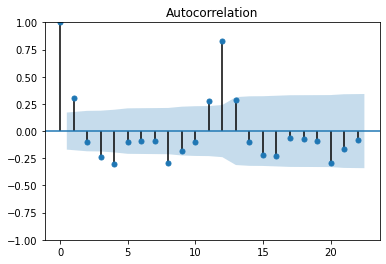

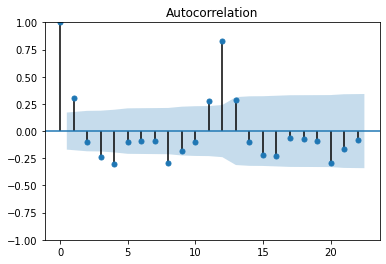

In [ ]:
plot_acf(rolling_mean_detrended_diff['#Passengers'])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


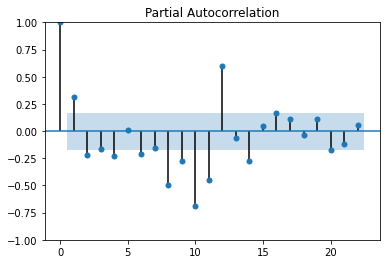

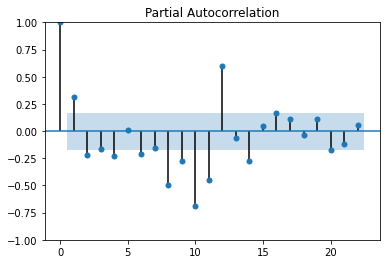

In [ ]:
plot_pacf(rolling_mean_detrended_diff['#Passengers'])

In [ ]:
from pmdarima import auto_arima

In [ ]:
order=auto_arima(rolling_mean_detrended_diff['#Passengers'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1314.475, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1303.387, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1298.888, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1312.483, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1295.760, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1297.960, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1298.290, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1293.760, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1296.888, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1301.389, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0

In [ ]:
rolling_mean_detrended_diff.shape

(132, 1)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX , SARIMAXResults

In [ ]:
train=rolling_mean_detrended_diff.iloc[:120]['#Passengers']
test=rolling_mean_detrended_diff.iloc[121:]['#Passengers']

In [ ]:
# building up my model and training.

sky=SARIMAX(train,order=(3,0,3),seasonal_order=(3,0,3,12)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting 

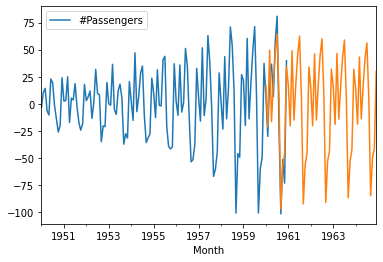

In [ ]:
# predicting the projections for the next 5 years.
# 12*5=60
p_5=sky.forecast(steps=60)
rolling_mean_detrended_diff.plot()
p_5.plot()